In [4]:
import pandas as pd
import numpy as np
import missingno as mno
import zipfile
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/survival analysis/e_commerce_churn/E Commerce Dataset.xlsx')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,50002.0,1.0,NaN,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,50003.0,1.0,NaN,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1.0,0.0,Phone,1.0,12.0,CC,Male,NaN,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626.0,0.0,10.0,Computer,1.0,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,18.0,1.0,2.0,4.0,150.71
5626,55627.0,0.0,13.0,Mobile Phone,1.0,13.0,Credit Card,Male,3.0,5.0,Fashion,5.0,Married,6.0,0.0,16.0,1.0,2.0,NaN,224.91
5627,55628.0,0.0,1.0,Mobile Phone,1.0,11.0,Debit Card,Male,3.0,2.0,Laptop & Accessory,4.0,Married,3.0,1.0,21.0,1.0,2.0,4.0,186.42
5628,55629.0,0.0,23.0,Computer,3.0,9.0,Credit Card,Male,4.0,5.0,Laptop & Accessory,4.0,Married,4.0,0.0,15.0,2.0,2.0,9.0,178.90


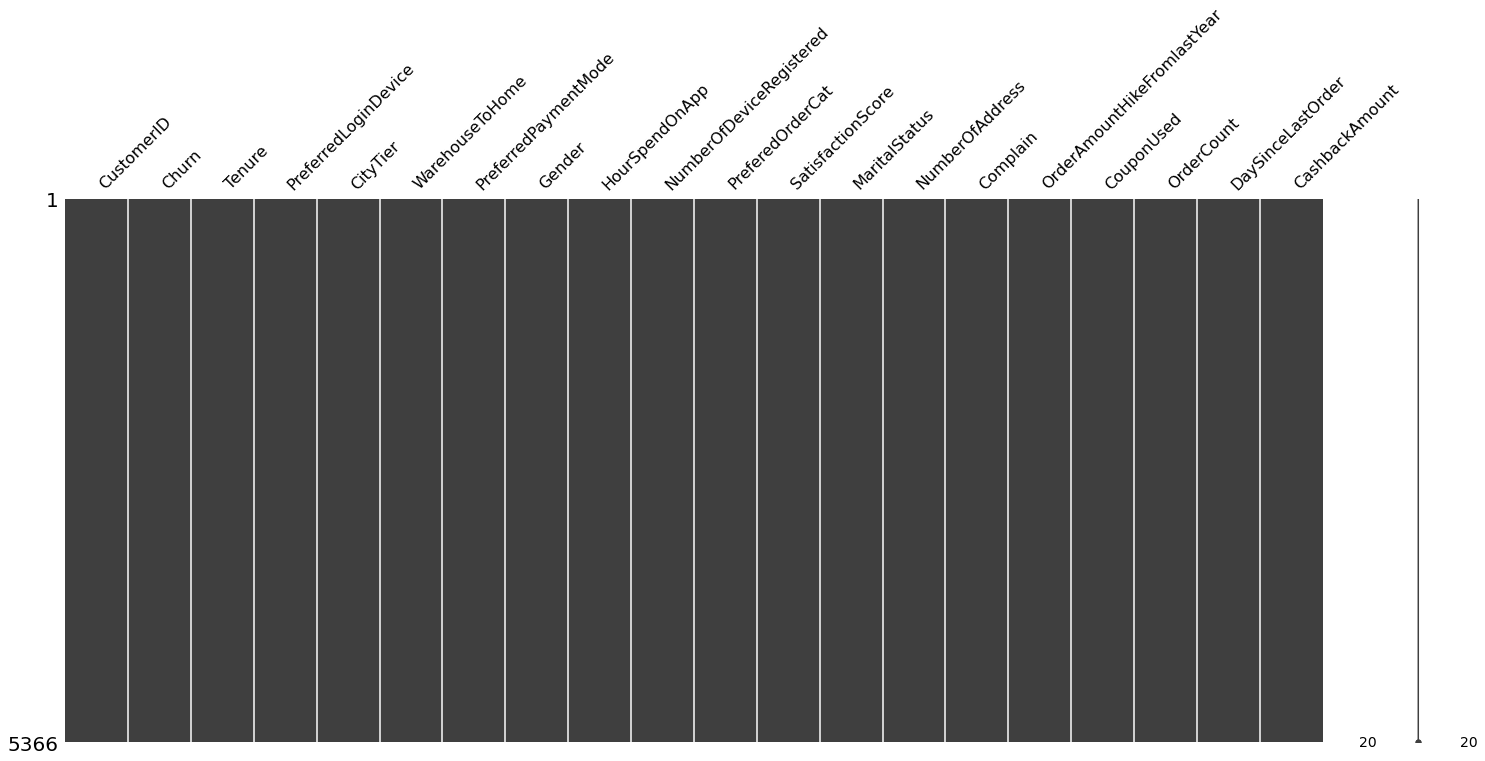

In [13]:
mno.matrix(df)

In [12]:
pd.DataFrame({'Dtype': df.dtypes, 'Nunique': df.nunique(), 'Isnull': df.isnull().sum()}, index=df.columns)

,Dtype,Nunique,Isnull
CustomerID,float64,5366,0
Churn,float64,2,0
Tenure,float64,36,0
PreferredLoginDevice,object,3,0
CityTier,float64,3,0
WarehouseToHome,float64,34,0
PreferredPaymentMode,object,7,0
Gender,object,2,0
HourSpendOnApp,float64,6,0
NumberOfDeviceRegistered,float64,6,0


In [8]:
df.dropna(subset=['Tenure'], inplace=True)

In [11]:
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [14]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/survival analysis/e_commerce_churn/data.csv', index=False)